# Kapittel 20

Med strategi 1 brukar vi 33.30 s på å krysse elva
Med strategi 2 brukar vi 27.08 s på å krysse elva


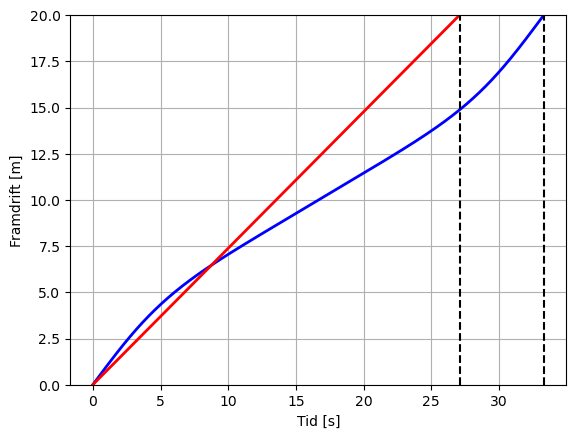

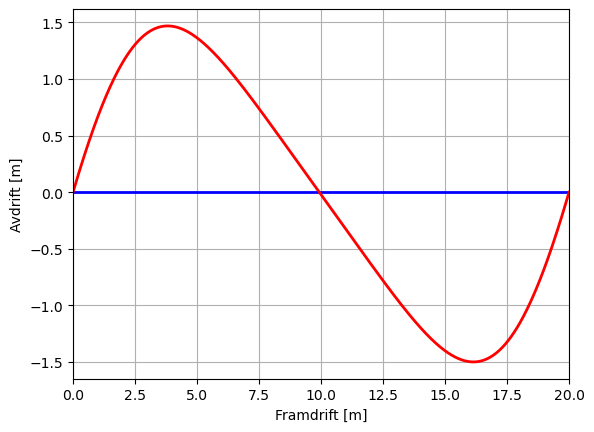

In [4]:
"""Dette skriptet estimerar kor lang tid det tar å krysse ei elv med variabel straum

Strategi 1 går ut på å alltid kompensere for straumen ved å gjere 
y-komponenten av svømme-farten like stor som straument S(x).
Strategi 2 går ut på at vinkelen theta mellom farten v og x-aksen blir holdt 
fast heile svømmeturen. Vinkelen blir då bestemt av kravet om at ein ikkje 
skal ha noko netto avdrift i y-retning.

Skriptet reknar ut kor lang tid ein brukar med kvar av metodane. I tillegg 
plottar vi banen gjennom elva og framdrifta over elva plotta som funksjon av 
tid.
"""

# Importerer bibliotek
import numpy as np
from matplotlib import pyplot as plt

# Input-variablar
D = 20          # Breidda
v = 1           # Svømme-fart
S_max = 0.9     # Maksimal straum
N = 500         # Antal punkt i diskretiseringa

def S(x):
    """Funksjon for straum-profil"""
    return S_max*np.exp(-(x-D/2)**4/5000)
    
def trapes(x, y):
    """Funksjon som estimerer eit integral ved hjelp av 
    trapes-metoden
    """
    L = len(x)                # Antal punkt
    dx = x[1] - x[0]       # Delta x (antar uniformt grid)
    T = 0.5*dx*(y[0] + y[-1]) # Første og siste punkt
    for i in range(1,L-1):    # Summerer alle andre bidrag
        T = T + dx*y[i]         
    return T

# Tida det tar med strategi 1:
x_vektor = np.linspace(0, D, N)
tid_vektor = 1/np.sqrt(v**2 - S(x_vektor)**2)
T1 = trapes(x_vektor, tid_vektor)

# Skriv resultatet til skjerm
print(f'Med strategi 1 brukar vi {T1:.2f} s på å krysse \
elva')    

# Bestemmer vinkelen for strategi 2
S_vektor = S(x_vektor)
integral = trapes(x_vektor, S_vektor)
theta = np.arcsin(integral/(v*D))
T2 = D**2/np.sqrt((v*D)**2 - integral**2)

# Skriv resultatet til skjerm
print(f'Med strategi 2 brukar vi {T2:.2f} s på å krysse \
elva')

# Plottar framdrifta som funksjon av tid for strategi 1:
# Tida brukt for kvar \Delta x, strategi 1:
framdrift_tid_S1 = np.zeros(N)    # Allokerer
dx = D/(N-1)
for i in range(1, N):
    x = x_vektor[i]
    framdrift_tid_S1[i] = framdrift_tid_S1[i-1] + \
    dx*1/np.sqrt(v**2 - S(x)**2)

# Strategi 2 gir ei rett linje:
framdrift_tid_S2 = x_vektor/(v*np.cos(theta))    

# Lagar plottet
# Strategi 1
plt.plot(framdrift_tid_S1, x_vektor, 'b-', linewidth=2)
# Strategi 2
plt.plot(framdrift_tid_S2, x_vektor, 'r-', linewidth=2)
# Markerer sluttidene som loddrette strekar
plt.vlines([T1, T2], 0, D, linestyles='dashed', 
    colors='black')
# Pyntar på figuren
plt.xlabel('Tid [s]')
plt.ylabel('Framdrift [m]')
plt.ylim(0, D)
plt.grid(visible=True)
plt.show()

# Plottar avdrift ved strategi 2 som funksjon av framdrift 
# Strategi 1 har inga avdrift
# Vektor med t-verdiar
tid_vektor_S2 = np.linspace(0, T2, N)     
dt = T2/(N-1)
# Framdrift
x_vektor_S2 = v*np.cos(theta)*tid_vektor_S2
# Allokerer vektor for avdrift
y_vektor_S2 = np.zeros(N)
x = 0
for i in range(1, N):
    x = x_vektor_S2[i]
    y_vektor_S2[i] = y_vektor_S2[i-1] + \
    (v*np.sin(theta) - S(x))*dt

# Lagar plottet    
# Strategi 1 (vassrett linje)
plt.plot([0, D], [0, 0], 'b-', linewidth=2)
# Strategi 2
plt.plot(x_vektor_S2, y_vektor_S2, 'r-', linewidth=2)    
plt.xlabel('Framdrift [m]')
plt.ylabel('Avdrift [m]')
plt.xlim(0, D)
plt.grid(visible=True)
plt.show()